In [1]:
import pickle

# If you are running locally, make sure you are in the directory of KuaiRec.
rootpath="./"

In [2]:
import pandas as pd

print("Loading big matrix...")
big_matrix = pd.read_csv(rootpath + "data/big_matrix.csv")
# print("Loading small matrix...")
# small_matrix = pd.read_csv(rootpath + "data/small_matrix.csv")

# print("Loading social network...")
# social_network = pd.read_csv(rootpath + "data/social_network.csv")
# social_network["friend_list"] = social_network["friend_list"].map(eval)

print("Loading item features...")
item_categories = pd.read_csv(rootpath + "data/item_categories.csv")
item_categories["feat"] = item_categories["feat"].map(eval)

# print("Loading user features...")
# user_features = pd.read_csv("data/user_features.csv")

# print("Loading items' daily features...")
# item_daily_features = pd.read_csv("data/item_daily_features.csv")

print("All data loaded.")

Loading big matrix...
Loading item features...
All data loaded.


In [3]:
big_matrix = big_matrix.sort_values(by=['user_id','timestamp'],ascending=True)

In [4]:
big_matrix.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


# 一.数据过滤

## 1.1 过滤完全重复的数据（所有字段都相同）

In [5]:
print("过滤重复")
orig_num = big_matrix.shape[0]
big_matrix = big_matrix.drop_duplicates()
big_matrix = big_matrix.reset_index(drop=True)
now_num = big_matrix.shape[0]

过滤重复


In [6]:
filter_num = orig_num - now_num 
print("过滤的交互数量为:",filter_num)
print("原先的交互数量为:",orig_num)
print("原先的交互数量为:",now_num)
print("过滤掉{:.2f}%的交互数量".format(100*filter_num/orig_num))

过滤的交互数量为: 965819
原先的交互数量为: 12530806
原先的交互数量为: 11564987
过滤掉7.71%的交互数量


# 1.2 过滤用户连续交互以及交叠交互的数据

In [7]:
is_du = (big_matrix.shift(-1)["user_id"] == big_matrix["user_id"]) & (big_matrix.shift(-1)["video_id"] == big_matrix["video_id"])

In [8]:
# 过滤2
orig_num = big_matrix.shape[0]

big_matrix = big_matrix[is_du == False]
big_matrix = big_matrix.reset_index(drop=True)

now_num = big_matrix.shape[0]

In [9]:
filter_num = orig_num - now_num 
print("过滤的交互数量为:",filter_num)
print("原先的交互数量为:",orig_num)
print("原先的交互数量为:",now_num)
print("过滤掉{:.2f}%的交互数量".format(100*filter_num/orig_num))

过滤的交互数量为: 304826
原先的交互数量为: 11564987
原先的交互数量为: 11260161
过滤掉2.64%的交互数量


In [10]:
is_du = (big_matrix.shift(-2)["user_id"] == big_matrix["user_id"]) & (big_matrix.shift(-2)["video_id"] == big_matrix["video_id"]) 

In [11]:
# 过滤2
orig_num = big_matrix.shape[0]

big_matrix = big_matrix[is_du == False]
big_matrix = big_matrix.reset_index(drop=True)

now_num = big_matrix.shape[0]

In [12]:
filter_num = orig_num - now_num 
print("过滤的交互数量为:",filter_num)
print("原先的交互数量为:",orig_num)
print("原先的交互数量为:",now_num)
print("过滤掉{:.2f}%的交互数量".format(100*filter_num/orig_num))

过滤的交互数量为: 25482
原先的交互数量为: 11260161
原先的交互数量为: 11234679
过滤掉0.23%的交互数量


## 1.3 统计数据集合中重复的情况

In [13]:
isduplicated = big_matrix.duplicated(subset=["user_id","video_id"], keep='first') 

In [14]:
print("有{:.2f}%交互是重复的 ".format(100*sum(isduplicated)/big_matrix.shape[0]))
print("用户平均有{:.0f}个交互是重复的".format(sum(isduplicated)/len(big_matrix.user_id.unique())))
print("用户平均的交互数量是{:.0f}".format(big_matrix.shape[0]/len(big_matrix.user_id.unique())))

有8.31%交互是重复的 
用户平均有130个交互是重复的
用户平均的交互数量是1566


In [15]:
big_matrix

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000
...,...,...,...,...,...,...,...,...
11234674,7175,6630,4342,13855,2020-09-05 15:00:33.379,20200905,1.599289e+09,0.313389
11234675,7175,1281,34618,140017,2020-09-05 15:07:10.576,20200905,1.599290e+09,0.247241
11234676,7175,3407,12619,21888,2020-09-05 15:08:45.228,20200905,1.599290e+09,0.576526
11234677,7175,10360,6455,7067,2020-09-05 19:10:36.995,20200905,1.599304e+09,0.913400


In [16]:
all_video = big_matrix.video_id.unique()
print(len(all_video))

10728


In [17]:
user_id = big_matrix.user_id.unique()
print(len(user_id))

7176


# 为video增加cate和tag

In [18]:
video_cat_tag = pd.read_csv( "video_cate_tag.csv")

In [19]:
big_matrix = pd.merge(big_matrix, video_cat_tag, how='left', on=['video_id'])

In [20]:
all_video = big_matrix.video_id.unique()
print(len(all_video))

10728


# 二、给交互数据打标签 

In [21]:
# like   看2遍  
like = big_matrix["play_duration"] >= 2*big_matrix["video_duration"]
big_matrix["like"] = like

# ---------------------------------
# complete play  看1遍
completeclick = big_matrix["play_duration"] >= big_matrix["video_duration"]
big_matrix["completeclick"] = completeclick


# ---------------------------------
# long time play   大于18秒
longclick1 = (big_matrix["play_duration"] >= big_matrix["video_duration"]) & (big_matrix["video_duration"] <=18000)
longclick2 = ( (big_matrix["play_duration"] >18000) & (big_matrix["video_duration"] >18000))
big_matrix["longclick"] = longclick1 | longclick2


# -------------click--------------------
# valid play     大于7秒
isclick1 = (big_matrix["play_duration"] >= big_matrix["video_duration"]) & (big_matrix["video_duration"] <=7000)
isclick2 = ( (big_matrix["play_duration"] >7000) & (big_matrix["video_duration"] >7000))
big_matrix["validclick"] = isclick1 | isclick2


# ---------------------------------
# dislike  小于3秒  short_play
shortplay1 = (big_matrix["play_duration"] < 3000) & (big_matrix["video_duration"]>3000)
shortplay2 = (big_matrix["play_duration"] < big_matrix["video_duration"]) & (big_matrix["video_duration"]<=3000)
big_matrix["shortplay"] = shortplay1 | shortplay2

In [22]:
result = big_matrix.groupby(['user_id', 'video_id'])['validclick'].nunique()
# Filter for cases where both True and False exist (nunique == 2)
user_count = result[result == 2].index.get_level_values('user_id').nunique()

In [23]:
user_count/7176

0.9874581939799331

In [24]:
like_num = sum(big_matrix["like"])
completeclick_num = sum(big_matrix["completeclick"])
longclick_num = sum(big_matrix["longclick"])
click_num = sum(big_matrix["validclick"])

unclick_num = big_matrix.shape[0] - sum(big_matrix["validclick"])
dislick_num = sum(big_matrix["shortplay"])
user_num = len(big_matrix.user_id.unique())

print("用户数量： ", user_num)
print("用户平均喜欢行为个数：  ", like_num/user_num)
print("用户平均完成行为个数：  ",completeclick_num/user_num)
print("用户平均长播放行为个数：  ",longclick_num/user_num)
print("用户平均点击行为个数：  ",click_num/user_num)

print("用户平均未点击行为个数：",unclick_num/user_num)
print("用户平均short play行为个数：",dislick_num/user_num)

用户数量：  7176
用户平均喜欢行为个数：   118.75473801560759
用户平均完成行为个数：   539.196209587514
用户平均长播放行为个数：   548.9646042363433
用户平均点击行为个数：   873.9315774804905
用户平均未点击行为个数： 691.6591415830546
用户平均short play行为个数： 272.5569955406912


In [61]:
def df_analysis(df):
    
    like_num = sum(df["like"])
    dislick_num = sum(df["shortplay"])
    
    click_num = sum(df["validclick"])
    unclick_num = df.shape[0] - sum(df["validclick"])
    
    complete_num = sum(df["completeclick"])
    
    user_num = len(df.user_id.unique())
    
    print("用户数量： ", user_num)
    print("==========================")
    print("交互行为个数：  ", len(df) )
    print("点击行为个数：  ", click_num)
    print("未点击行为个数：",unclick_num)
    print("喜欢行为个数：  ",like_num)
    print("完整观看行为个数：  ",complete_num)
    print("==========================")
    
    print("用户平均交互行为个数：  ", len(df)/user_num)
    print("用户平均点击行为个数：  ", click_num/user_num)
    print("用户平均未点击行为个数：",unclick_num/user_num)
    print("用户平均喜欢行为个数：  ",like_num/user_num)
    print("用户平均完整观看行为个数：  ",complete_num/user_num)
    
    
    # print("用户平均不喜欢行为个数：",dislick_num/user_num)

# dislike还是不恰当，还是分为click、 unclick、 like[观看了2遍以及以上]

In [26]:
print(sum(big_matrix["play_duration"]<1))
print(big_matrix.shape[0])


123673
11234679


In [27]:
big_matrix[big_matrix["play_duration"]<1].head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,cate_id,tag_id,video_tag_name,like,completeclick,longclick,validclick,shortplay
94,0,3725,0,10688,2020-07-07 00:05:20.21,20200707,1.594052e+09,0.0,11,1,生活,False,False,False,False,True
107,0,5278,0,52667,2020-07-07 00:30:16.917,20200707,1.594053e+09,0.0,6,4,娱乐,False,False,False,False,True
274,0,6716,0,7574,2020-07-09 10:08:11.819,20200709,1.594260e+09,0.0,11,1,生活,False,False,False,False,True
279,0,279,0,12501,2020-07-09 10:25:48.395,20200709,1.594262e+09,0.0,5,2,穿搭,False,False,False,False,True
328,0,1871,0,5667,2020-07-10 15:44:38.534,20200710,1.594367e+09,0.0,8,5,颜值,False,False,False,False,True


In [28]:
big_matrix.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,cate_id,tag_id,video_tag_name,like,completeclick,longclick,validclick,shortplay
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397,9,9,搞笑,False,True,True,True,False
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082,28,6,情感,False,True,True,True,False
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613,25,12,亲子,False,False,False,False,True
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885,9,9,搞笑,False,False,False,False,True
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000,6,4,娱乐,False,False,False,False,True


In [29]:
big_matrix.date.unique()
# 20200705, 20200706, 20200707, 20200708, 20200709, 20200710, 20200711, 20200712      
# 20200801, 20200802, 20200803, 20200804, 20200805, 20200806, 20200807, 20200808, 20200809, 20200810
# 20200827, 20200828, 20200829, 20200830, 20200831, 20200901, 20200902, 20200903, 20200904, 20200905

array([20200705, 20200706, 20200707, 20200708, 20200709, 20200710,
       20200711, 20200712, 20200801, 20200802, 20200803, 20200804,
       20200805, 20200806, 20200807, 20200808, 20200809, 20200810,
       20200827, 20200828, 20200829, 20200830, 20200831, 20200901,
       20200902, 20200903, 20200904, 20200905])

In [30]:
train1 = big_matrix[(big_matrix["date"] >= 20200705) & (big_matrix["date"] <= 20200710)]
train2 = big_matrix[(big_matrix["date"] >= 20200801) & (big_matrix["date"] <= 20200808)]
train3 = big_matrix[(big_matrix["date"] >= 20200827) & (big_matrix["date"] <= 20200903)]

test1 = big_matrix[(big_matrix["date"] >= 20200711) & (big_matrix["date"] <= 20200712)]
test2 = big_matrix[(big_matrix["date"] >= 20200809) & (big_matrix["date"] <= 20200810)]
test3 = big_matrix[(big_matrix["date"] >= 20200904) & (big_matrix["date"] <= 20200905)]

test_all = pd.concat([test1, test2, test3])
train_all = pd.concat([train1, train2, train3])

In [31]:
data_num= big_matrix.groupby(["date"]).size()

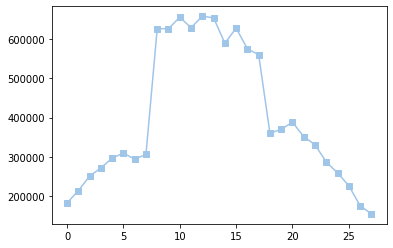

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data_num.values,'s-',color = "#9fc5e8",label="ATT-RLSTM")#s-:方形
plt.show()

In [33]:
print("\n所有数据集：")
df_analysis(big_matrix)

print("=====train=====")
print("\n train_all：")
df_analysis(train_all)
print("\n train1：")
df_analysis(train1)
print("\n train2：")
df_analysis(train2)
print("\n train3：")
df_analysis(train3)

print("=====test=====")
print("\n test_all：")
df_analysis(test_all)
print("\n test1：")
df_analysis(test1)
print("\n test2：")
df_analysis(test2)
print("\n test3：")
df_analysis(test3)


所有数据集：
用户数量：  7176
用户平均交互行为个数：   1565.590719063545
用户平均点击行为个数：   873.9315774804905
用户平均未点击行为个数： 691.6591415830546
用户平均喜欢行为个数：   118.75473801560759
用户平均完整观看行为个数：   539.196209587514
=====train=====

 train_all：
用户数量：  7176
用户平均交互行为个数：   1277.66262541806
用户平均点击行为个数：   713.2543199554069
用户平均未点击行为个数： 564.4083054626533
用户平均喜欢行为个数：   96.75320512820512
用户平均完整观看行为个数：   440.38085284280936

 train1：
用户数量：  7007
用户平均交互行为个数：   217.56543456543457
用户平均点击行为个数：   123.54103039817325
用户平均未点击行为个数： 94.02440416726131
用户平均喜欢行为个数：   19.34322820037106
用户平均完整观看行为个数：   80.49892964178679

 train2：
用户数量：  7163
用户平均交互行为个数：   707.9913444087673
用户平均点击行为个数：   394.4143515286891
用户平均未点击行为个数： 313.5769928800782
用户平均喜欢行为个数：   51.566941225743406
用户平均完整观看行为个数：   244.8821722741868

 train3：
用户数量：  6979
用户平均交互行为个数：   368.6321822610689
用户平均点击行为个数：   204.53804269952715
用户平均未点击行为个数： 164.09413956154177
用户平均喜欢行为个数：   27.136982375698523
用户平均完整观看行为个数：   120.65138271958733
=====test=====

 test_all：
用户数量：  7167
用户平均交互行为个数：   288.2896

In [34]:
all_video = big_matrix.video_id.unique()
print(len(all_video))

10728


# 三、训练数据过滤 

In [35]:
# 1 过滤 test中的item，未在train中出现的
# 2 过滤整体的item出现次数小于4的

In [36]:
print(big_matrix.shape)

(11234679, 16)


In [37]:
def filter_test(train, test):
    train_video_list = train.video_id.unique()
    train_user_list = train.user_id.unique()
    
    orgi_num = test.shape[0]
    test = test[test.video_id.isin(train_video_list)]
    test = test[test.user_id.isin(train_user_list)]
    cur_num = test.shape[0]
    print("过滤前：{} 过滤后：{} 被过滤的数量：{}".format(orgi_num, cur_num, orgi_num - cur_num))
    return test

test_all = filter_test(train_all, test_all)
big_matrix = pd.concat([train_all, test_all])

过滤前：2066172 过滤后：1948893 被过滤的数量：117279


In [38]:
all_video = big_matrix.video_id.unique()
print(len(all_video))

print("\n test_all：")
df_analysis(test_all)

9777

 test_all：
用户数量：  7167
用户平均交互行为个数：   271.92591042277104
用户平均点击行为个数：   151.47439653969582
用户平均未点击行为个数： 120.45151388307521
用户平均喜欢行为个数：   19.599972094321195
用户平均完整观看行为个数：   92.01437142458491


In [39]:
d = pd.DataFrame(big_matrix.video_id.value_counts())
d.columns = ['nums']

d = d[d['nums'] < 4]          # 出现小于4次的全部删除
delindexs = d.index
print("过滤掉的video个数有：", len(delindexs))

big_matrix = big_matrix[~big_matrix["video_id"].isin(delindexs)]

# 10728
item_num = len(big_matrix.video_id.unique())
print("现在的video个数有：",item_num)


过滤掉的video个数有： 538
现在的video个数有： 9239


In [40]:
train1 = big_matrix[(big_matrix["date"] >= 20200705) & (big_matrix["date"] <= 20200710)]
train2 = big_matrix[(big_matrix["date"] >= 20200801) & (big_matrix["date"] <= 20200808)]
train3 = big_matrix[(big_matrix["date"] >= 20200827) & (big_matrix["date"] <= 20200903)]

test1 = big_matrix[(big_matrix["date"] >= 20200711) & (big_matrix["date"] <= 20200712)]
test2 = big_matrix[(big_matrix["date"] >= 20200809) & (big_matrix["date"] <= 20200810)]
test3 = big_matrix[(big_matrix["date"] >= 20200904) & (big_matrix["date"] <= 20200905)]

test_all = pd.concat([test1, test2, test3])
train_all = pd.concat([train1, train2, train3])

test_all = filter_test(train_all, test_all)
big_matrix = pd.concat([train_all, test_all])

过滤前：1948852 过滤后：1948852 被过滤的数量：0


In [41]:
item_num = len(big_matrix.video_id.unique())
print("现在的video个数有：",item_num)


all_video = big_matrix.video_id.unique()
print(len(all_video))

print("\n test_all：")
df_analysis(test_all)

现在的video个数有： 9239
9239

 test_all：
用户数量：  7167
用户平均交互行为个数：   271.9201897586159
用户平均点击行为个数：   151.47090832984512
用户平均未点击行为个数： 120.44928142877076
用户平均喜欢行为个数：   19.598158225198826
用户平均完整观看行为个数：   92.01144132831031


In [42]:
# ===========统计===========

# 原先有7176个用户，有9个用户被过滤掉，因此需要重新reindex
# 注意reindex之后的user_id和其他文件里的user_id会不同
user_num = len(big_matrix.user_id.unique())
user_list = big_matrix.user_id.unique()
filter_user = []
for i in range(7176):
    if i in user_list:
        continue
    filter_user.append(i)
print("过滤掉的用户有：", filter_user)



# 原先有10728个item，
# 注意reindex之后的item_id和其他文件里的item_id会不同
item_num = len(big_matrix.video_id.unique())
item_list = big_matrix.video_id.unique()
filter_video = []
for i in range(10728):
    if i in item_list:
        continue
    filter_video.append(i)
print("过滤掉的video个数有：", len(filter_video))
print("现在的video个数有：",len(item_list))
# print("过滤掉的video有：", filter_video)


print("现在的user个数有：",len(user_list))
print("现在的video个数有：",len(item_list))
print("现在的交互个数有：", big_matrix.shape[0])
print("现在的每个用户交互个数有：", big_matrix.shape[0]/len(user_list))
print("密度：", big_matrix.shape[0]/len(item_list)/len(user_list))


# ===========处理===========

# 对user和item进行reindex
user_reindex_dict = dict()
user_list = big_matrix.user_id.unique()
cur_id = 0
for user_id in user_list:
    user_reindex_dict[user_id] = cur_id
    cur_id = cur_id + 1

big_matrix["user_id"] = big_matrix["user_id"].map(lambda x:user_reindex_dict[x])

# 对user和item进行reindex
video_reindex_dict = dict()
video_list = big_matrix.video_id.unique()
cur_id = 0
for video_id in video_list:
    video_reindex_dict[video_id] = cur_id
    cur_id = cur_id + 1

big_matrix["video_id"] = big_matrix["video_id"].map(lambda x:video_reindex_dict[x])

# 注意index是从0开始的

过滤掉的用户有： []
过滤掉的video个数有： 1489
现在的video个数有： 9239
现在的user个数有： 7176
现在的video个数有： 9239
现在的交互个数有： 11116446
现在的每个用户交互个数有： 1549.1145484949832
密度： 0.16767123590161093


In [62]:
print("\n所有数据集：")
df_analysis(big_matrix)



所有数据集：
用户数量：  7176
交互行为个数：   11116446
点击行为个数：   6203167
未点击行为个数： 4913279
喜欢行为个数：   834217
完整观看行为个数：   3818941
用户平均交互行为个数：   1549.1145484949832
用户平均点击行为个数：   864.4324136008919
用户平均未点击行为个数： 684.6821348940914
用户平均喜欢行为个数：   116.25097547380156
用户平均完整观看行为个数：   532.1824136008919


In [41]:
import os
 
# 判断文件夹是否存在，不存在则创建
dirs1 = './newinputs2' 
if not os.path.exists(dirs1):
    os.makedirs(dirs1)
    
with open("./newinputs2/user_reindex_dict.pkl", 'wb') as f:
    pickle.dump(user_reindex_dict,f)

with open("./newinputs2/video_reindex_dict.pkl", 'wb') as f:
    pickle.dump(video_reindex_dict,f)

In [58]:
len(video_reindex_dict)

9239

In [61]:
video_reindex_dict

TypeError: 'builtin_function_or_method' object is not subscriptable

In [43]:
big_matrix = big_matrix.reset_index(drop=True)

In [44]:
# 20200705, 20200706, 20200707, 20200708, 20200709, 20200710, 20200711, 20200712      
# 20200801, 20200802, 20200803, 20200804, 20200805, 20200806, 20200807, 20200808, 20200809, 20200810
# 20200827, 20200828, 20200829, 20200830, 20200831, 20200901, 20200902, 20200903, 20200904, 20200905
# 给交互数据打上time_span 标签
def time_span_set(x):
    if x.date >= 20200705 and x.date <= 20200712:
        return 1
    elif x.date >= 20200801 and x.date <= 20200810:
        return 2
    elif x.date >= 20200827 and x.date <= 20200905:
        return 3
    else:
        return 4
big_matrix["time_span"] = big_matrix.apply(time_span_set, axis = 1)

KeyboardInterrupt: 

In [ ]:
big_matrix[200000:200005]

In [45]:
# # 观察用户0 1 2 3的行为
# temp = train1[train1.user_id.isin([0,1,2,3])]
# temp = temp[["user_id","video_id","validclick"]]
# temp.to_csv("user4.csv",header = True, index=None)

# 生成用户的entire seq以及click mask、like mask还有end_idx

In [46]:
# 得到每个行为对应的end_idx   从1开始
big_matrix = big_matrix.sort_values(by=['user_id', 'time_span','timestamp'],ascending=True)
big_matrix = big_matrix.reset_index(drop=True)   
big_matrix = big_matrix.reset_index()   # 多了一列 index

big_matrix = big_matrix.rename(columns={'index':'inter_index'})
isduplicated = big_matrix.duplicated(subset=["user_id","time_span"], keep='first') 

first_df = big_matrix[isduplicated==False]
first_df = first_df.reset_index()
first_df = first_df.rename(columns={'index':'first_index'})
first_df = first_df[["user_id","time_span","first_index"]]

result = pd.merge(big_matrix, first_df, how='left', on=['user_id', 'time_span'])
result["entire_end_idx"] = result["inter_index"] - result["first_index"]
# result = result.drop(columns=['index', 'first_index'])

big_matrix = result

In [47]:
big_matrix[(big_matrix.user_id == 834) & (big_matrix.time_span == 2)]

,inter_index,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,cate_id,tag_id,video_tag_name,like,completeclick,longclick,validclick,shortplay,time_span,first_index,entire_end_idx
1327533,1327533,834,5059,5595,6567,2020-08-01 12:29:09.76,20200801,1.596256e+09,0.851987,28,3,资讯,False,False,False,False,False,2,1327533,0
1327534,1327534,834,3575,8153,11400,2020-08-01 12:29:23.938,20200801,1.596256e+09,0.715175,7,8,运动,False,False,False,True,False,2,1327533,1
1327535,1327535,834,2541,7287,13167,2020-08-01 12:29:41.277,20200801,1.596256e+09,0.553429,6,4,娱乐,False,False,False,True,False,2,1327533,2
1327536,1327536,834,2276,7202,5700,2020-08-01 12:30:55.618,20200801,1.596256e+09,1.263509,7,8,运动,False,True,True,True,False,2,1327533,3
1327537,1327537,834,4414,5910,20538,2020-08-01 12:31:44.432,20200801,1.596256e+09,0.287759,11,1,生活,False,False,False,False,False,2,1327533,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329739,1329739,834,2380,5751,9567,2020-08-10 10:22:01.534,20200810,1.597026e+09,0.601129,28,3,资讯,False,False,False,False,False,2,1327533,2206
1329740,1329740,834,5733,5486,6767,2020-08-10 10:31:50.433,20200810,1.597027e+09,0.810699,5,2,穿搭,False,False,False,False,False,2,1327533,2207
1329741,1329741,834,3904,8126,7034,2020-08-10 10:35:10.661,20200810,1.597027e+09,1.155246,15,0,unknown,False,True,True,True,False,2,1327533,2208
1329742,1329742,834,3790,8030,11617,2020-08-10 10:40:08.147,20200810,1.597027e+09,0.691228,19,6,情感,False,False,False,True,False,2,1327533,2209


In [48]:
# 得到用户的行为序列 click_mask  like_mask

user_time_df = big_matrix[['user_id','time_span']].drop_duplicates()
user_big_matrix = big_matrix.groupby(['user_id','time_span'])
user_list = big_matrix.user_id.unique()


user_entire_seq = [[[],[],[]] for user_id in user_list]
user_item_cate_seq = [[[],[],[]] for user_id in user_list]
user_item_tag_seq = [[[],[],[]] for user_id in user_list]


click_mask = [[[],[],[]] for user_id in user_list]     #存储3个time_span的msk
like_mask = [[[],[],[]] for user_id in user_list]
complete_mask = [[[],[],[]] for user_id in user_list]

all_num = user_time_df.shape[0]
for idx in range(all_num):
    user_id = user_time_df.iloc[idx]["user_id"]
    time_id = user_time_df.iloc[idx]["time_span"]
   
    items = user_big_matrix.get_group((user_id,time_id))["video_id"].values
    item_cates = user_big_matrix.get_group((user_id,time_id))["cate_id"].values
    item_tags = user_big_matrix.get_group((user_id,time_id))["tag_id"].values

    is_click = user_big_matrix.get_group((user_id,time_id))["validclick"].values
    is_like = user_big_matrix.get_group((user_id,time_id))["like"].values
    is_complete = user_big_matrix.get_group((user_id,time_id))["completeclick"].values
    
    
    user_entire_seq[user_id][time_id-1]=items
    user_item_cate_seq[user_id][time_id-1]=item_cates
    user_item_tag_seq[user_id][time_id-1]=item_tags

    click_mask[user_id][time_id-1]=is_click
    like_mask[user_id][time_id-1]=is_like
    complete_mask[user_id][time_id-1]=is_complete

In [50]:
print("原来交互数量：", big_matrix.shape[0])
big_matrix = big_matrix[(big_matrix.entire_end_idx != 0)]
print("现在交互数量：", big_matrix.shape[0])

原来交互数量： 11095249
现在交互数量： 11095249


In [51]:
big_matrix = big_matrix[["user_id","video_id","validclick","like","watch_ratio","time_span","entire_end_idx","completeclick","cate_id","tag_id","date","timestamp"]]

In [52]:
train1 = big_matrix[(big_matrix["date"] >= 20200705) & (big_matrix["date"] <= 20200710)]
train2 = big_matrix[(big_matrix["date"] >= 20200801) & (big_matrix["date"] <= 20200808)]
train3 = big_matrix[(big_matrix["date"] >= 20200827) & (big_matrix["date"] <= 20200903)]

test1 = big_matrix[(big_matrix["date"] >= 20200711) & (big_matrix["date"] <= 20200712)]
test2 = big_matrix[(big_matrix["date"] >= 20200809) & (big_matrix["date"] <= 20200810)]
test3 = big_matrix[(big_matrix["date"] >= 20200904) & (big_matrix["date"] <= 20200905)]

test_all = pd.concat([test1, test2, test3])
train_all = pd.concat([train1, train2, train3])

In [53]:
user_entire_seq[0][0]

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  1

In [56]:
with open("./newinputs2/kuairec_dataset.pkl", 'wb') as f:
    pickle.dump(train_all.values, f)     #转为二维数组
    pickle.dump(test_all.values, f)      #转为二维数组
    pickle.dump(user_entire_seq, f)
    
    pickle.dump(user_item_cate_seq, f)
    pickle.dump(user_item_tag_seq, f)
    
    pickle.dump(click_mask, f)
    pickle.dump(like_mask, f)
    pickle.dump(complete_mask, f)
    
    